In [15]:
#IMPORTING THE NECESSARY LIBRARIES REQUIRED
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.discrete.discrete_model import Probit, Logit
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#PARSING THE DATA
data = pd.read_csv('m584.csv')
data.head()

,ymo,djsi,caldt,spindx,sprtrn,mo,yr,ret1,ind1,ret10,...,djsiret,cm3,cy10,spex,djex,smex,laex,spread,spi,dji
0,199901,108.03,1999-01-29,1279.64,0.041009,1,1999,0.053383,1561.607,0.071349,...,0.080300,-0.05,0,-0.239059,3.690000,0.9983,2.7949,0.38,0,1
1,199902,107.49,1999-02-26,1238.33,-0.032283,2,1999,-0.032374,1511.051,-0.054857,...,-0.004999,0.10,0,-7.668252,-4.939861,-7.6774,-9.9257,0.56,0,0
2,199903,111.43,1999-03-31,1286.37,0.038794,3,1999,0.042068,1574.617,-0.033778,...,0.036655,0.00,0,-0.560582,-0.774543,-0.2332,-7.8178,0.79,0,0
3,199904,116.32,1999-04-30,1335.18,0.037944,4,1999,0.030213,1622.191,0.072808,...,0.043884,-0.15,0,-0.495602,0.098405,-1.2687,2.9908,0.89,0,1
4,199905,114.54,1999-05-28,1301.84,-0.024970,5,1999,-0.032438,1569.571,0.040646,...,-0.015303,0.21,0,-6.997042,-6.030261,-7.7438,-0.4354,1.04,0,0


In [4]:
#IDENTIFYING THE TARGET VARIABLE AND FEATURES, dropping unecessary columns
target = data.djsiret
features = data.drop(columns=['djsiret', 'caldt'])
features.head()

,ymo,djsi,spindx,sprtrn,mo,yr,ret1,ind1,ret10,ind10,...,vol,cm3,cy10,spex,djex,smex,laex,spread,spi,dji
0,199901,108.03,1279.64,0.041009,1,1999,0.053383,1561.607,0.071349,11929.482,...,0.003336,-0.05,0,-0.239059,3.690000,0.9983,2.7949,0.38,0,1
1,199902,107.49,1238.33,-0.032283,2,1999,-0.032374,1511.051,-0.054857,11275.070,...,0.003482,0.10,0,-7.668252,-4.939861,-7.6774,-9.9257,0.56,0,0
2,199903,111.43,1286.37,0.038794,3,1999,0.042068,1574.617,-0.033778,10894.227,...,0.003214,0.00,0,-0.560582,-0.774543,-0.2332,-7.8178,0.79,0,0
3,199904,116.32,1335.18,0.037944,4,1999,0.030213,1622.191,0.072808,11687.410,...,0.002727,-0.15,0,-0.495602,0.098405,-1.2687,2.9908,0.89,0,1
4,199905,114.54,1301.84,-0.024970,5,1999,-0.032438,1569.571,0.040646,12162.460,...,0.003086,0.21,0,-6.997042,-6.030261,-7.7438,-0.4354,1.04,0,0


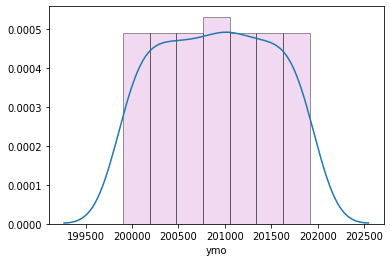

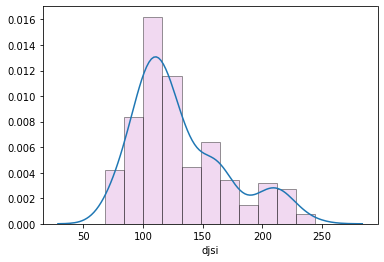

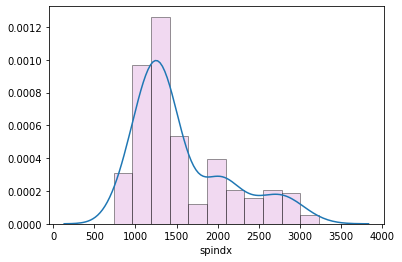

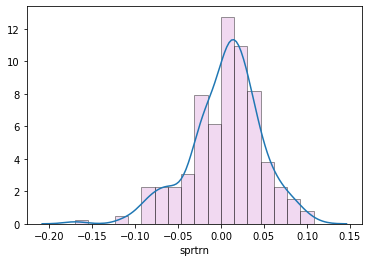

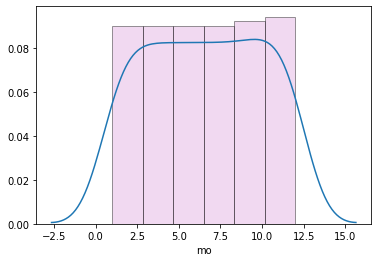

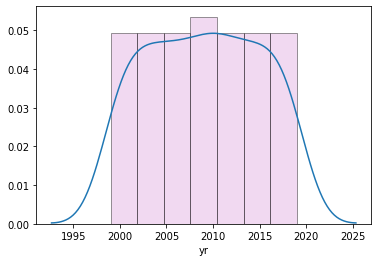

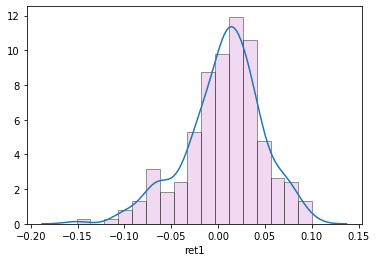

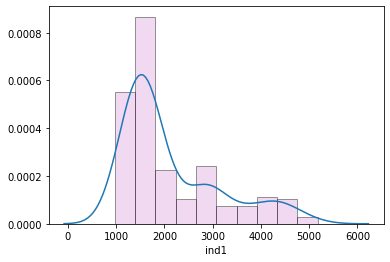

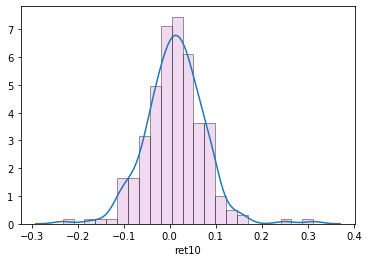

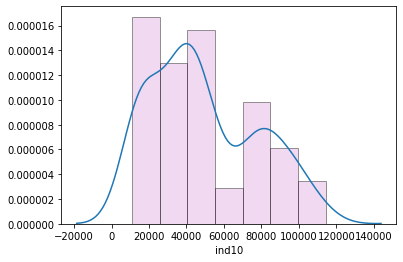

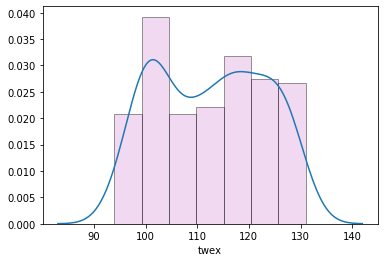

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

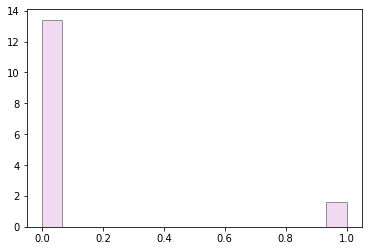

In [5]:
#data visualization
for column in features:
    sns.distplot(features[column], hist_kws=dict(color='plum',    edgecolor="k", linewidth=1))
    plt.show()
    

In [ ]:
#USINF F_REGRESSION TO IDENTIFY THE MOST IMPORTANT FEATURES IN THE DATA TO BE USED IN THE REGRESSION PROBLEM
bestfeatures = SelectKBest(score_func=f_regression, k=20)
fit = bestfeatures.fit(features, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score')) 

In [6]:
#IDENTIFYING THE X AND Y FEATURES FOR EASY REGRESSION
key_features = ['djex', 'dji','sprtrn', 'ret1', 'spex', 'smex', 'ret10', 'laex', 'spi', 'vol']
X = features[key_features]
y = target

In [7]:
#SCALING THE DATA TO REMOVE ANY OUTLIERS
sc = MinMaxScaler()
X_transformed = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
#CROSS VALIDATING THE FIRST MODEL
model1 = SVR()
model1.fit(X_train, y_train)
val_score=cross_val_score(model1, X, y, cv=5)
print(val_score.mean())


0.11624154437342546


In [20]:
#CROSS VALIDATOING THE SECOND MODEL
model2=RandomForestRegressor()
model2.fit(X_train, y_train)
val_score2 = cross_val_score(model2, X, y, cv=5)
print(val_score2.mean())

0.7014569502611474


In [17]:
#cross validating third model
model3 = Probit(y, X)
print(model3.summary())

ValueError: endog must be in the unit interval.

In [21]:
#MAKING THE PREDICTIONS
#Model 2 is therefore much efficient in predicting the target variable than model 1. Model 2 can therefore be used to predict future returns as follows
predicted = model2.predict(X_test)
error=mean_squared_error(y_test, predicted)
error

0.0002569744972455149

In [22]:
#The above model has predictions with a very small error